<a href="https://colab.research.google.com/github/ronaldosilvak/machine_learning/blob/main/Bank_Customer_Churn_(KNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema:
Criar um modelo que visa analisar potenciais clientes a deixarem o posto no banco

# Metadados

**RowNumber** — corresponde ao número do registro (linha) e não tem efeito na saída.

**CustomerId** – contém valores aleatórios e não afeta a saída do cliente do banco.

**LastName** – o sobrenome de um cliente não tem impacto na decisão de deixar o banco.

**CreditScore** – pode afetar a rotatividade de clientes, uma vez que um cliente com uma pontuação de crédito mais alta tem menos probabilidade de deixar o banco.

**Geography** – a localização de um cliente pode afetar sua decisão de deixar o banco.

**Gender** – é interessante explorar se o género desempenha um papel na saída de um cliente do banco.

**Age** – isto é certamente relevante, uma vez que os clientes mais velhos têm menos probabilidades de abandonar o banco do que os mais jovens.

**Tenure** – refere-se ao número de anos que o cliente é cliente do banco. Normalmente, os clientes mais velhos são mais leais e menos propensos a deixar o banco.

**Balance** – também um indicador muito bom da rotatividade de clientes, já que as pessoas com saldo mais alto em suas contas têm menos probabilidade de deixar o banco em comparação com aquelas com saldos mais baixos.

**NumOfProducts** — refere-se ao número de produtos que um cliente comprou por meio do banco.

**HasCrCard** – indica se um cliente possui ou não um cartão de crédito. Essa coluna também é relevante, pois quem tem cartão de crédito tem menor probabilidade de sair do banco.

**IsActiveMember** – clientes ativos têm menos probabilidade de deixar o banco.

**EstimatedSalary** – tal como acontece com o equilíbrio, as pessoas com salários mais baixos têm maior probabilidade de deixar o banco em comparação com aquelas com salários mais elevados.

**Exited** – independentemente de o cliente ter saído ou não do banco.

**Complain** – o cliente tem reclamação ou não.

**Satisfaction Score** – Pontuação fornecida pelo cliente para resolução de reclamação.

**Card Type** – tipo de cartão em poder do cliente.


**Points Earned** – os pontos ganhos pelo cliente ao usar cartão de crédito.

In [6]:
import pandas as pd
import numpy as np

In [7]:
dados = pd.read_csv('/content/Customer-Churn-Records.csv')
dados.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# Análise exploratória (EDA)

In [8]:
dados.shape

(10000, 18)

In [9]:
dados.describe().iloc[:, 0:10]

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [11]:
dados.groupby(['Geography', 'Card Type'])[['Exited']].count()

Exited
Geography Card Type        
France    DIAMOND      1230
          GOLD         1235
          PLATINUM     1264
          SILVER       1285
Germany   DIAMOND       648
          GOLD          653
          PLATINUM      608
          SILVER        600
Spain     DIAMOND       629
          GOLD          614
          PLATINUM      623
          SILVER        611

# Visualização dos dados

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
sns.set_style("darkgrid")

In [14]:
dados['Card Type'].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

<Axes: xlabel='Exited'>

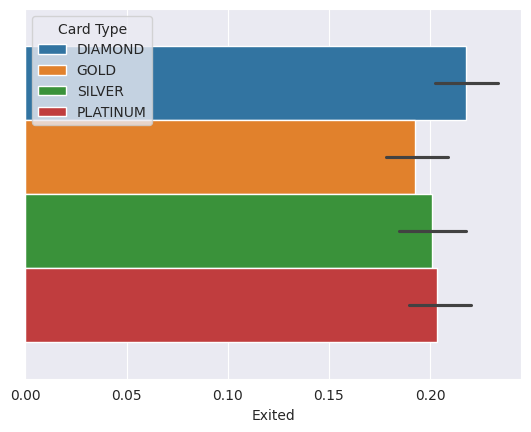

In [15]:
sns.barplot(data=dados, x='Exited', hue='Card Type')

(array([ 611., 2179., 3629., 1871.,  828.,  523.,  208.,  127.,   20.,
           4.]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <BarContainer object of 10 artists>)

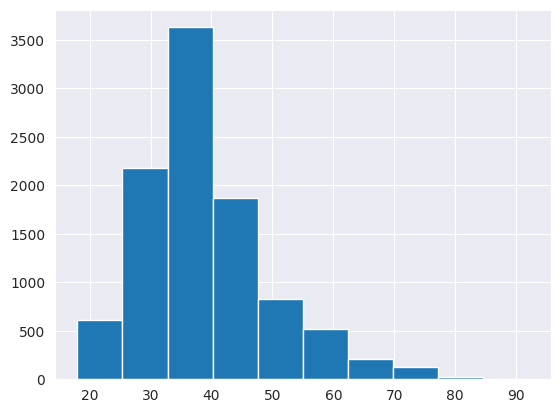

In [16]:
plt.hist(dados['Age'])

In [17]:
dados.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [18]:
dados['Tenure'].describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

In [19]:
def agrupa_tempo_cliente(anos_no_banco):
  if anos_no_banco <= 3:
    return '0-3'
  elif anos_no_banco <= 6:
    return '4-6'
  else:
    return '7+'


In [20]:
dados['agrupa_tempo_servico'] = dados['Tenure'].apply(agrupa_tempo_cliente)

In [21]:
dados[['agrupa_tempo_servico', 'Tenure', 'Exited']]

,agrupa_tempo_servico,Tenure,Exited
0,0-3,2,1
1,0-3,1,0
2,7+,8,1
3,0-3,1,0
4,0-3,2,0
...,...,...,...
9995,4-6,5,0
9996,7+,10,0
9997,7+,7,1
9998,0-3,3,1


In [22]:
# Porcentagem de saídas dos serviços do banco agrupados por tempo. Usei a média pois a variável baseia-se em dados binários
dados.groupby('agrupa_tempo_servico')[['Exited']].mean() * 100

,Exited
agrupa_tempo_servico,
0-3,21.141227
4-6,20.485175
7+,19.535016


<Axes: xlabel='agrupa_tempo_servico', ylabel='Exited'>

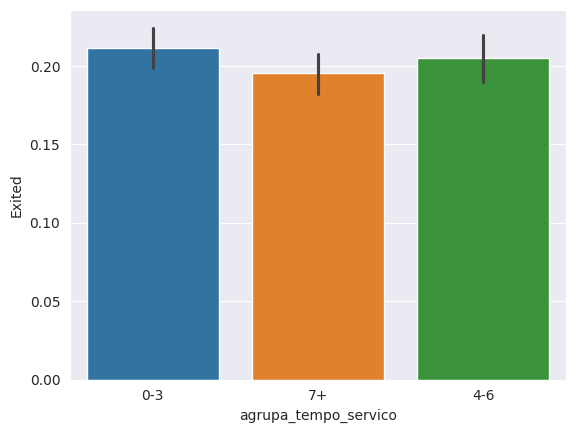

In [23]:
sns.barplot(data=dados, x='agrupa_tempo_servico', y='Exited', hue='agrupa_tempo_servico')

# Pré-processamento (Padronização & LabelEncoder)

Variáveis explicativas:
Todas exceto "Exited"

Variável independente:
Exited -> Cliente saiu ou não do banco

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
X = dados.drop(columns=['Exited', 'Surname', 'Gender', 'CustomerId', 'RowNumber', 'agrupa_tempo_servico']).values
y = dados['Exited'].values

In [26]:
le_cardtype = LabelEncoder()
le_geography = LabelEncoder()

In [27]:
X[:, 1] = le_geography.fit_transform(X[:, 1])
X[:, 11] = le_cardtype.fit_transform(X[:, 11])

# Padronização

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler_dados = StandardScaler()
X = scaler_dados.fit_transform(X)

# Train, test and Split



In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.25, random_state=0)

In [32]:
X_treinamento.shape, X_teste.shape

((7500, 13), (2500, 13))

In [33]:
y_treinamento.shape, y_teste.shape

((7500,), (2500,))

# Salvando as variáveis

In [34]:
import pickle

with open('modelo_churn_bank.pkl', mode='wb') as f:
  pickle.dump([X_treinamento, X_teste, y_treinamento, y_teste], f)


# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
with open('modelo_churn_bank.pkl', 'rb') as f:
  X_treinamento, X_teste, y_treinamento, y_teste = pickle.load(f)

In [37]:
X_treinamento.shape, X_teste.shape

((7500, 13), (2500, 13))

In [38]:
y_treinamento.shape, y_teste.shape

((7500,), (2500,))

In [39]:
knn_churn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [40]:
knn_churn.fit(X_treinamento, y_treinamento)

KNeighborsClassifier()

In [41]:
previsoes = knn_churn.predict(X_teste)
previsoes

array([0, 1, 0, ..., 0, 0, 0])

In [42]:
y_teste

array([0, 1, 0, ..., 0, 0, 0])

# Verificando acurácia

In [43]:
from sklearn.metrics import accuracy_score, classification_report

In [44]:
accuracy_score(previsoes, y_teste)

0.9984

0.9984

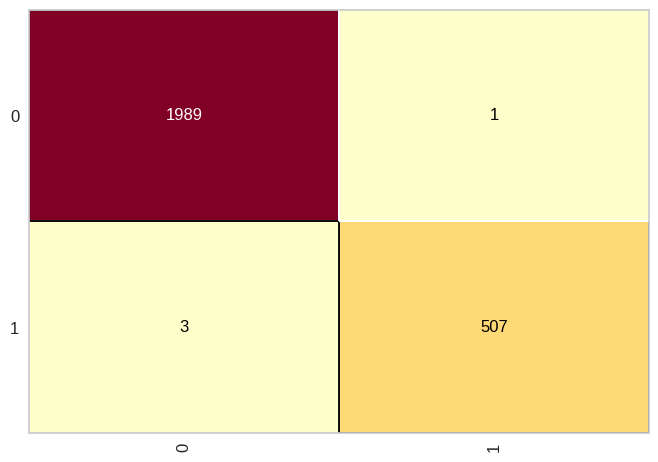

In [45]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_churn)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_teste, y_teste)

In [46]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1990
           1       1.00      0.99      1.00       510

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500

